## `Import libs`

In [76]:
# Common Libs
import pandas as pd
import numpy as np


# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from kneed import KneeLocator
%matplotlib inline


# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# ML
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier

# Metrics
from sklearn.metrics import confusion_matrix

In [2]:
iris = pd.read_csv('C:\\Users\\T\\Downloads\\Iris.csv')

In [3]:
iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
iris = iris.drop('Id', axis = 1)

In [6]:
iris

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [7]:
iris.shape

(150, 5)

In [8]:
iris.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [9]:
iris.duplicated().sum()

3

In [10]:
iris.drop_duplicates(inplace = True)

In [11]:
iris.duplicated().sum()

0

<AxesSubplot:xlabel='Species', ylabel='count'>

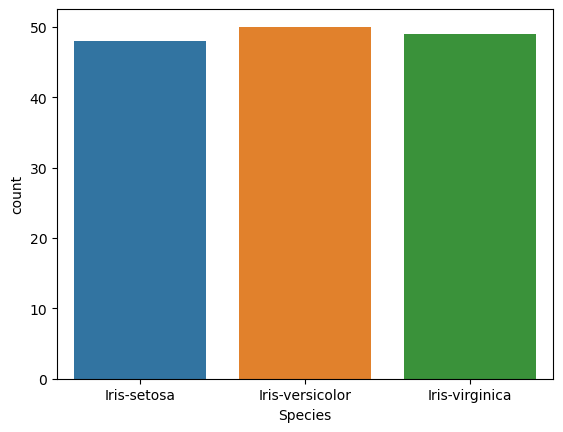

In [12]:
sns.countplot(x = 'Species', data = iris)

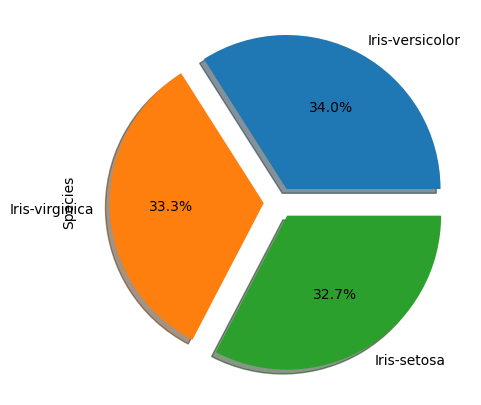

In [13]:
iris['Species'].value_counts().plot.pie(explode=[0.1,0.1,0.1],autopct='%1.1f%%'
                                        ,shadow=True, figsize=(8,5))
plt.show()

In [14]:
iris.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109321,0.871305,0.817058
SepalWidthCm,-0.109321,1.000000,-0.421057,-0.356376
PetalLengthCm,0.871305,-0.421057,1.000000,0.961883
PetalWidthCm,0.817058,-0.356376,0.961883,1.000000


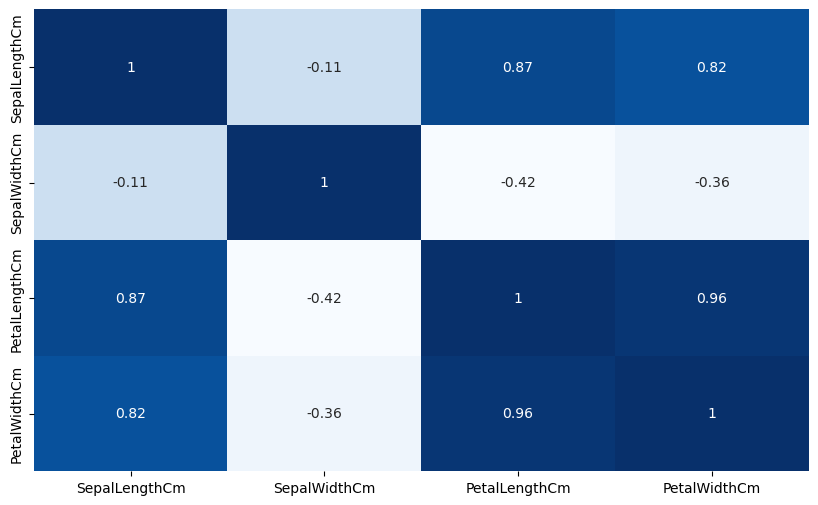

In [15]:
#heatmap for corr
plt.figure(figsize = (10, 6))
sns.heatmap(iris.corr(), annot = True, cbar = False, cmap = 'Blues')
plt.show()

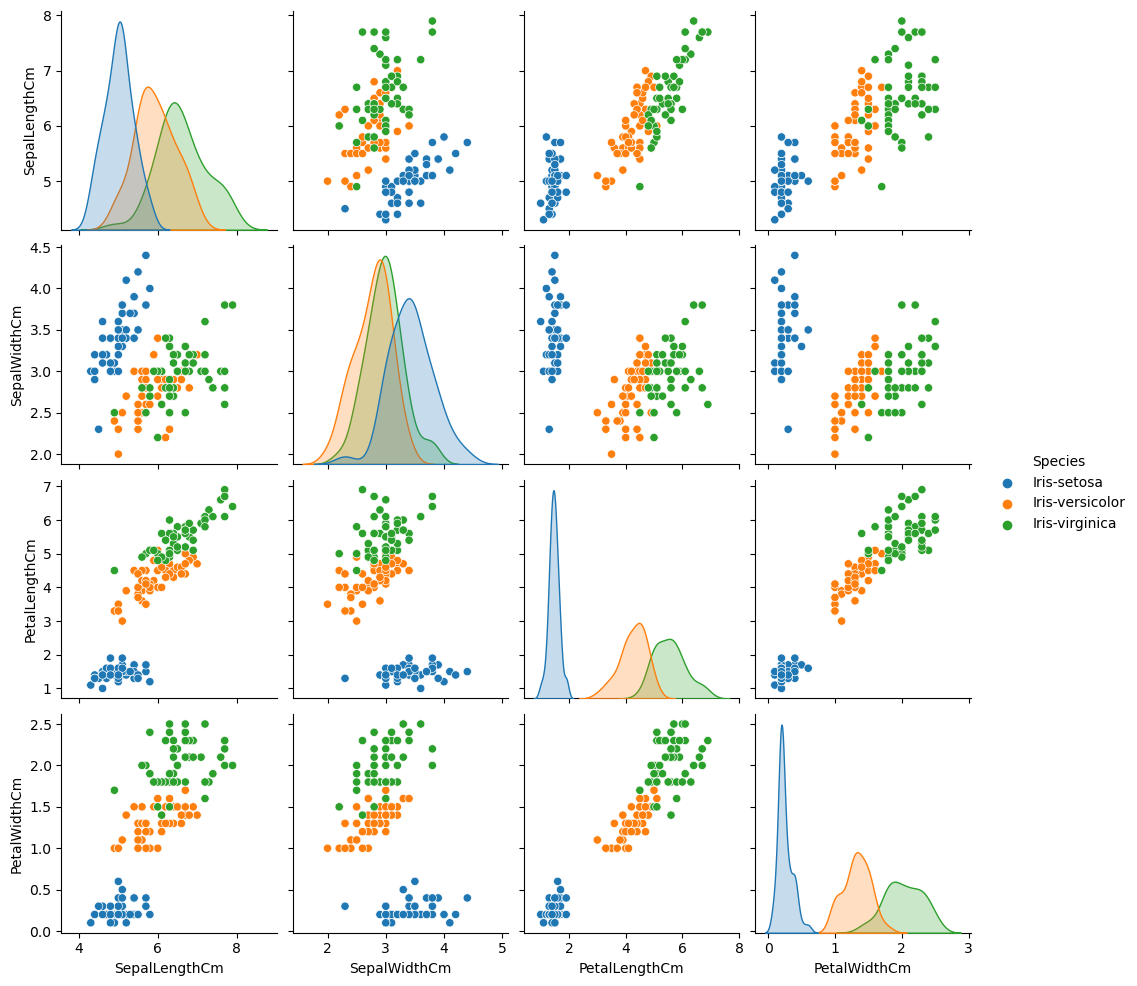

In [16]:
sns.pairplot(iris , hue='Species')

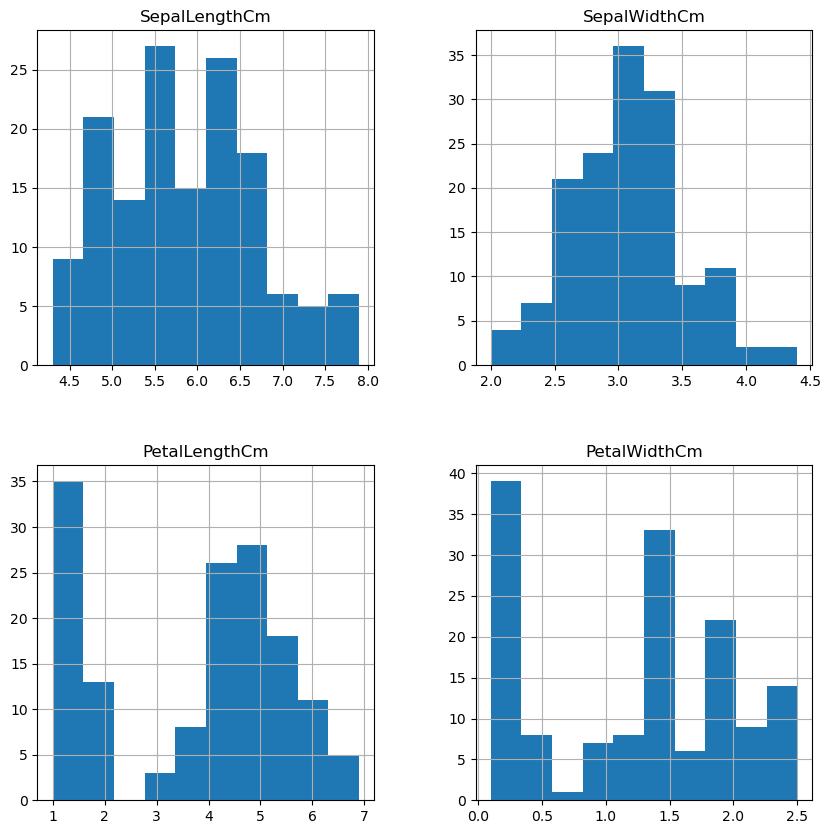

In [17]:
iris.hist(figsize=(10,10))
plt.show()

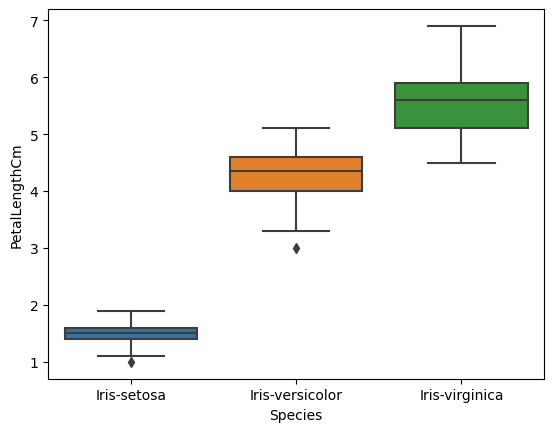

In [18]:
ax = sns.boxplot(x="Species", y="PetalLengthCm", data=iris)

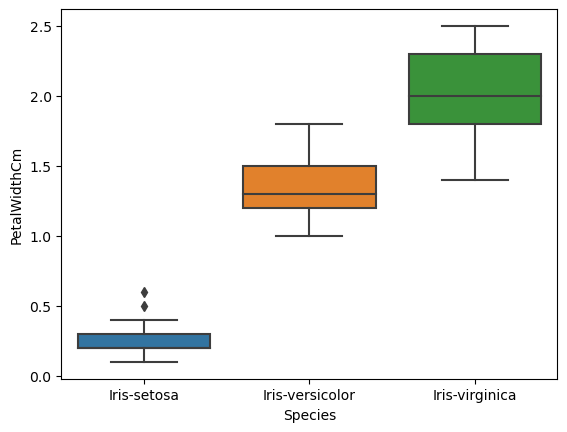

In [19]:
ax = sns.boxplot(x="Species", y="PetalWidthCm", data=iris)

<AxesSubplot:xlabel='Species', ylabel='SepalWidthCm'>

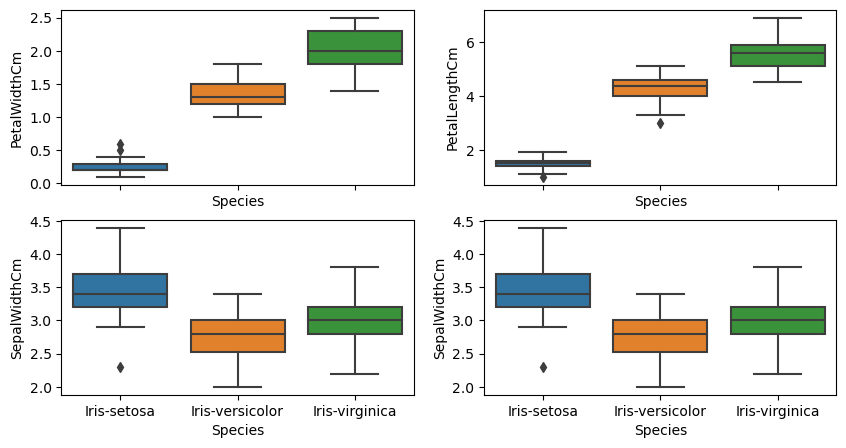

In [20]:
fig, axes = plt.subplots(2, 2, sharex=True, figsize=(10,5))

sns.boxplot(ax = axes[0, 0], x = "Species", y = "PetalWidthCm", data = iris)


sns.boxplot(ax = axes[0, 1], x = "Species", y = "PetalLengthCm", data = iris)


sns.boxplot(ax = axes[1, 0], x = "Species", y = "SepalWidthCm", data = iris)


sns.boxplot(ax = axes[1, 1], x = "Species", y = "SepalWidthCm", data = iris)

## `Splitting Data`

In [46]:
X = iris.drop('Species', axis = 1)

y = iris['Species']

In [47]:
X.shape, y.shape

((147, 4), (147,))

## ` Building Models`

## `1- KMeans `

### `Standardization`

In [48]:
X

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [49]:
Scalar = StandardScaler()

In [51]:
X = Scalar.fit_transform(X)

In [53]:
X

array([[-0.91550949,  1.0199714 , -1.35773692, -1.33570001],
       [-1.15755966, -0.12808217, -1.35773692, -1.33570001],
       [-1.39960983,  0.33113926, -1.41477817, -1.33570001],
       [-1.52063491,  0.10152855, -1.30069567, -1.33570001],
       [-1.03653457,  1.24958212, -1.35773692, -1.33570001],
       [-0.55243423,  1.93841426, -1.18661318, -1.07090176],
       [-1.52063491,  0.79036069, -1.35773692, -1.20330089],
       [-1.03653457,  0.79036069, -1.30069567, -1.33570001],
       [-1.76268509, -0.35769288, -1.35773692, -1.33570001],
       [-1.15755966,  0.10152855, -1.30069567, -1.46809914],
       [-0.55243423,  1.47919283, -1.30069567, -1.33570001],
       [-1.27858474,  0.79036069, -1.24365442, -1.33570001],
       [-1.27858474, -0.12808217, -1.35773692, -1.46809914],
       [-1.88371017, -0.12808217, -1.52886066, -1.46809914],
       [-0.06833389,  2.16802498, -1.47181942, -1.33570001],
       [-0.18935898,  3.08646783, -1.30069567, -1.07090176],
       [-0.55243423,  1.

### Testing for right K

In [54]:
init_params = {"init":"random", "n_init": 10, "max_iter": 300, "random_state": 42}

comp_list = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters = k, **init_params)
    kmeans.fit(X)
    comp_list.append(kmeans.inertia_)

C:\Users\T\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


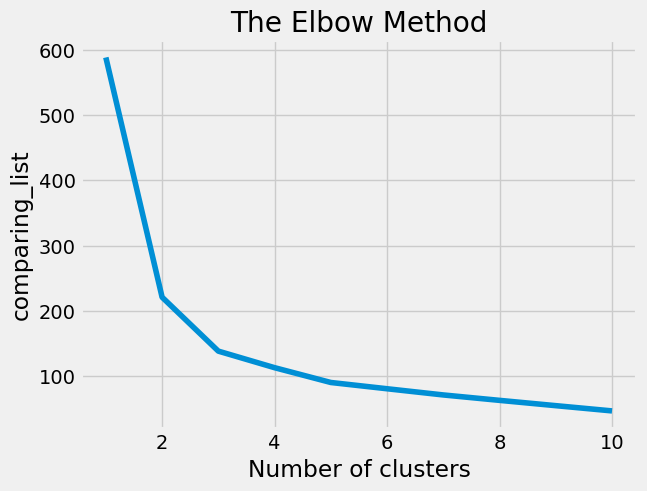

In [55]:
plt.plot(range(1, 11), comp_list)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('comparing_list') #within cluster sum of squares
plt.show()

In [56]:
k1=KneeLocator(range(1,11), comp_list, curve='convex', direction= 'decreasing')
k1.elbow

3

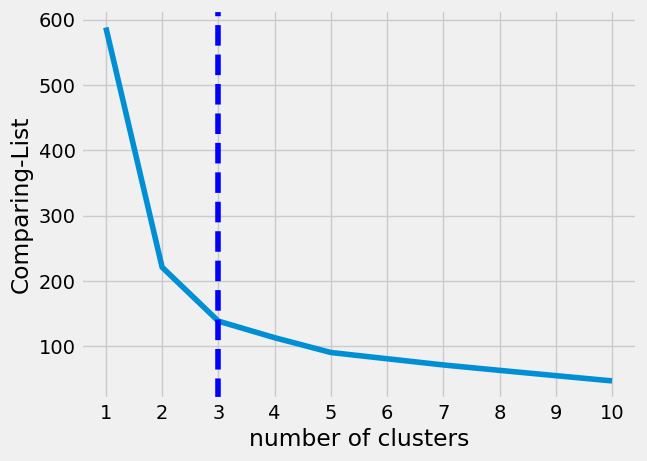

In [57]:
plt.style.use("fivethirtyeight")
plt.plot(range(1,11),comp_list)
plt.xticks(range(1,11))
plt.xlabel('number of clusters')
plt.ylabel('Comparing-List')
plt.axvline(x=k1.elbow, color='b', label= 'axvline-full height', ls= '--')
plt.show()

In [58]:
kmeans = KMeans(n_clusters = 3, max_iter = 300, n_init = 10, random_state = 42)

In [59]:
y_kmeans = kmeans.fit_predict(X)

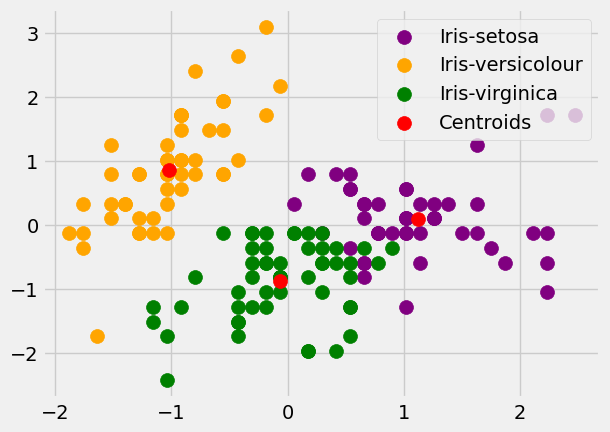

In [62]:
#Visualising the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'purple', label = 'Iris-setosa')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'orange', label = 'Iris-versicolour')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'red', label = 'Centroids')

plt.legend()

## `2- KNN `

## `Splitting  Data`

In [70]:
X_KNN = iris.drop('Species', axis = 1)

y_KNN = iris['Species']

In [71]:
X_KNN.shape, y_KNN.shape

((147, 4), (147,))

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X_KNN, y_KNN, test_size = 0.2, random_state = 42)

## `Standarization `

In [73]:
X_train

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
137,6.4,3.1,5.5,1.8
47,4.6,3.2,1.4,0.2
121,5.6,2.8,4.9,2.0
27,5.2,3.5,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
73,6.1,2.8,4.7,1.2
108,6.7,2.5,5.8,1.8
14,5.8,4.0,1.2,0.2
94,5.6,2.7,4.2,1.3


In [74]:
X_train = Scalar.fit_transform(X_train)
X_test = Scalar.transform(X_test)

In [75]:
X_train

array([[ 0.59486878,  0.05831127,  0.94250316,  0.76726863],
       [-1.60687754,  0.28572521, -1.38920785, -1.36694663],
       [-0.38368514, -0.62393057,  0.60127716,  1.03404553],
       [-0.8729621 ,  0.96796705, -1.33233685, -1.36694663],
       [-1.11760058,  1.195381  , -1.38920785, -1.36694663],
       [ 1.57342271, -0.16910268,  1.11311616,  0.50049172],
       [ 2.42965739,  1.65020889,  1.45434216,  1.03404553],
       [ 0.3502303 ,  0.74055311,  0.88563216,  1.43421089],
       [-0.99528134,  1.65020889, -1.10485285, -1.10016972],
       [-0.62832362,  1.87762284, -1.44607885, -1.10016972],
       [-0.62832362,  1.42279495, -1.33233685, -1.36694663],
       [ 2.18501891,  1.65020889,  1.62495516,  1.30082244],
       [ 0.47254954, -1.7610003 ,  0.31692216,  0.10032636],
       [ 1.20646499,  0.05831127,  0.71501916,  1.43421089],
       [ 0.83950727, -0.39651662,  0.43066416,  0.10032636],
       [-0.2613659 , -0.16910268,  0.20318015, -0.0330621 ],
       [ 1.08414575,  0.

In [79]:
knn = KNeighborsClassifier()

In [80]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [84]:
print('The accuracy of the knn classifier is', knn.score(X_train, y_train),'on training data')
print('The accuracy of the knn classifier is', knn.score(X_test, y_test),'on test data')

The accuracy of the knn classifier is 0.9658119658119658 on training data
The accuracy of the knn classifier is 0.9333333333333333 on test data


C:\Users\T\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\T\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to Tr